In [1]:
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Sample text dataset
text = """
Volvo Cars is a Swedish luxury automobile manufacturer headquartered in Gothenburg, Sweden. The company manufactures and markets sport utility vehicles, station wagons, hatchbacks, sedans, and compact executive sedans. The company was founded in 1927, and it has been a subsidiary of the Chinese automotive company Geely Holding Group since 2010. Volvo Cars' latest models incorporate innovative technology and design, reflecting the brand's commitment to safety and sustainability. The company also offers a range of electric and hybrid vehicles to meet the growing demand for eco-friendly transportation options.
"""

In [9]:
# Data Cleaning
text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
text = text.lower()  # Convert to lowercase
text

' volvo cars is a swedish luxury automobile manufacturer headquartered in gothenburg sweden the company manufactures and markets sport utility vehicles station wagons hatchbacks sedans and compact executive sedans the company was founded in 1927 and it has been a subsidiary of the chinese automotive company geely holding group since 2010 volvo cars latest models incorporate innovative technology and design reflecting the brands commitment to safety and sustainability the company also offers a range of electric and hybrid vehicles to meet the growing demand for ecofriendly transportation options '

In [10]:
# Tokenization and Normalization
tokens = nltk.word_tokenize(text)
lemmatizer = nltk.WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in nltk.corpus.stopwords.words('english')]
tokens

['volvo',
 'car',
 'swedish',
 'luxury',
 'automobile',
 'manufacturer',
 'headquartered',
 'gothenburg',
 'sweden',
 'company',
 'manufacture',
 'market',
 'sport',
 'utility',
 'vehicle',
 'station',
 'wagon',
 'hatchback',
 'sedan',
 'compact',
 'executive',
 'sedan',
 'company',
 'founded',
 '1927',
 'subsidiary',
 'chinese',
 'automotive',
 'company',
 'geely',
 'holding',
 'group',
 'since',
 '2010',
 'volvo',
 'car',
 'latest',
 'model',
 'incorporate',
 'innovative',
 'technology',
 'design',
 'reflecting',
 'brand',
 'commitment',
 'safety',
 'sustainability',
 'company',
 'also',
 'offer',
 'range',
 'electric',
 'hybrid',
 'vehicle',
 'meet',
 'growing',
 'demand',
 'ecofriendly',
 'transportation',
 'option']

In [11]:
# Join tokens back into a single string
processed_text = ' '.join(tokens)
processed_text

'volvo car swedish luxury automobile manufacturer headquartered gothenburg sweden company manufacture market sport utility vehicle station wagon hatchback sedan compact executive sedan company founded 1927 subsidiary chinese automotive company geely holding group since 2010 volvo car latest model incorporate innovative technology design reflecting brand commitment safety sustainability company also offer range electric hybrid vehicle meet growing demand ecofriendly transportation option'

In [13]:
# TF-IDF Calculation
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([processed_text])
tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.toarray()[0]))
tfidf_scores

{'1927': 0.11180339887498948,
 '2010': 0.11180339887498948,
 'also': 0.11180339887498948,
 'automobile': 0.11180339887498948,
 'automotive': 0.11180339887498948,
 'brand': 0.11180339887498948,
 'car': 0.22360679774997896,
 'chinese': 0.11180339887498948,
 'commitment': 0.11180339887498948,
 'compact': 0.11180339887498948,
 'company': 0.4472135954999579,
 'demand': 0.11180339887498948,
 'design': 0.11180339887498948,
 'ecofriendly': 0.11180339887498948,
 'electric': 0.11180339887498948,
 'executive': 0.11180339887498948,
 'founded': 0.11180339887498948,
 'geely': 0.11180339887498948,
 'gothenburg': 0.11180339887498948,
 'group': 0.11180339887498948,
 'growing': 0.11180339887498948,
 'hatchback': 0.11180339887498948,
 'headquartered': 0.11180339887498948,
 'holding': 0.11180339887498948,
 'hybrid': 0.11180339887498948,
 'incorporate': 0.11180339887498948,
 'innovative': 0.11180339887498948,
 'latest': 0.11180339887498948,
 'luxury': 0.11180339887498948,
 'manufacture': 0.1118033988749894

In [15]:
# Word Cloud Generation
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)

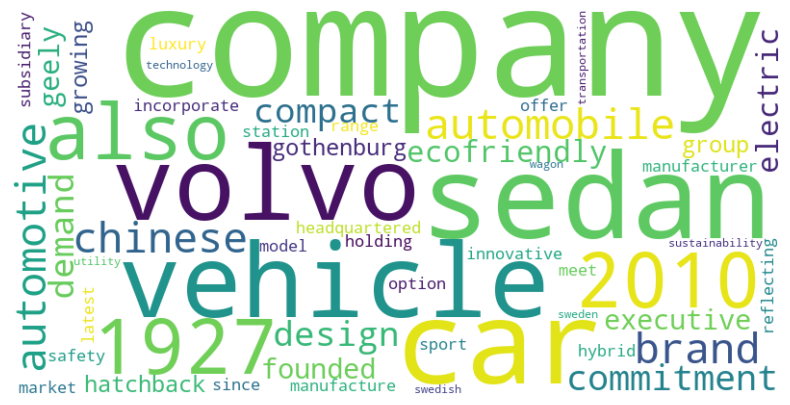

In [8]:
# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()